In [1]:
#import Libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   # for plotting


In [2]:
#import dataset

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
#Missing Values and Impitation
#Find out percentage of mising values in each column

df.isnull().sum() / len(df) * 100 # check for missing values

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [4]:
#drop the deck column from dataset
df.drop('deck', axis=1, inplace=True)

In [5]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

## *Filing missing values of age columns*

In [6]:
df['age'].mean()

np.float64(29.69911764705882)

In [7]:
df['age'].median()

np.float64(28.0)

In [8]:
df['age'].mode()[0]

np.float64(24.0)

In [9]:
# By means of age
df['age'].fillna((df['age'].mean()), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3108\4161245095.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna((df['age'].mean()), inplace=True)


In [10]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [11]:
# fill embark and embarked_town with mode

df['embarked'].fillna(df['embarked'].mode()[0], inplace= True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_3108\1514926428.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace= True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3108\1514926428.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [12]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

<Axes: >

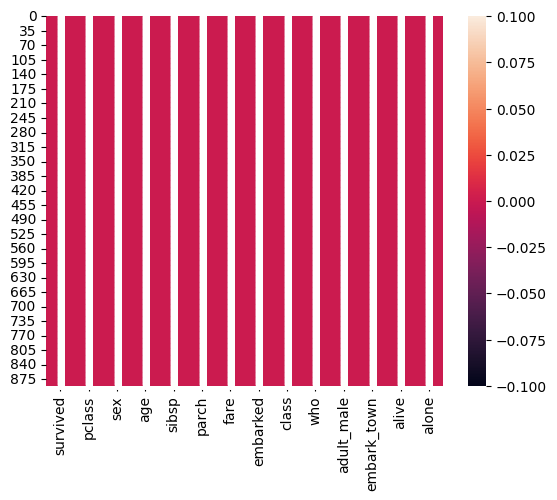

In [13]:
sns.heatmap(df.isnull(), annot=True)

## **BINNING**
>  Binning is grouping of numerical data into few categories to make a sense of it

In [14]:

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [15]:
df.age.min()

np.float64(0.42)

In [16]:
df.age.max()

np.float64(80.0)

<Axes: xlabel='age', ylabel='Count'>

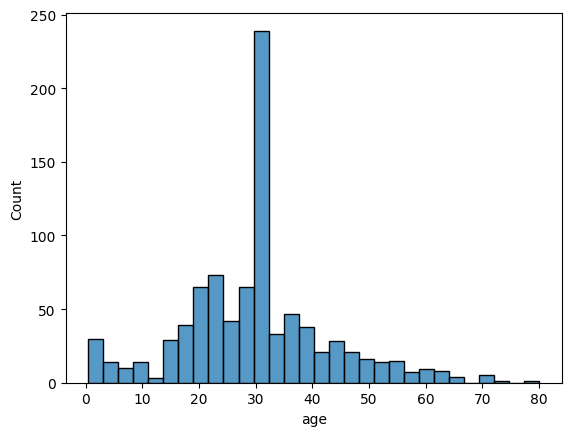

In [17]:
sns.histplot(df['age'])

## **Feature Engineering**

In [27]:
#Binning of age into seven (7) columns

bins = [0,1, 5, 12, 18, 30, 50, 80]
labels = ['infants', 'Toddlers', 'Kids', 'Teens', 'Youngs', 'MiddleAged','Old']

df['binned_age'] = pd.cut(df['age'], bins=bins, labels=labels)

In [28]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,binned_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Youngs
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,MiddleAged
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Youngs
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,MiddleAged
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,MiddleAged


In [29]:
df['binned_age'].value_counts()

binned_age
Youngs        447
MiddleAged    241
Teens          70
Old            64
Toddlers       30
Kids           25
infants        14
Name: count, dtype: int64

### **Renaming a Column** 

In [39]:
df.rename(columns={'binned_age' : 'age_groups'}, inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_groups
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False,Youngs
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,MiddleAged
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Youngs
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False,MiddleAged
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True,MiddleAged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True,Youngs
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True,Youngs
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False,Youngs
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,Youngs


## **Data Filteration**

In [40]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'age_groups'],
      dtype='object')

### *Make a dataFrame of 4 columns Only*

In [42]:
df_01 = df[['survived', 'age_groups', 'fare', 'class']]
df_01

,survived,age_groups,fare,class
0,0,Youngs,7.2500,Third
1,1,MiddleAged,71.2833,First
2,1,Youngs,7.9250,Third
3,1,MiddleAged,53.1000,First
4,0,MiddleAged,8.0500,Third
...,...,...,...,...
886,0,Youngs,13.0000,Second
887,1,Youngs,30.0000,First
888,0,Youngs,23.4500,Third
889,1,Youngs,30.0000,First


In [44]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   age_groups  891 non-null    category
 2   fare        891 non-null    float64 
 3   class       891 non-null    category
dtypes: category(2), float64(1), int64(1)
memory usage: 16.3 KB


In [45]:
df_01[df['class'] == 'First']

,survived,age_groups,fare,class
1,1,MiddleAged,71.2833,First
3,1,MiddleAged,53.1000,First
6,0,Old,51.8625,First
11,1,Old,26.5500,First
23,1,Youngs,35.5000,First
...,...,...,...,...
871,1,MiddleAged,52.5542,First
872,0,MiddleAged,5.0000,First
879,1,Old,83.1583,First
887,1,Youngs,30.0000,First


### *Lets select those persons which have paid more than 200 pounds*

In [48]:
df_01[df_01['fare'] > 200]

# store it in a object fare200plus
fare200plus = df_01[df_01['fare'] > 200]
fare200plus


,survived,age_groups,fare,class
27,0,Youngs,263.0000,First
88,1,Youngs,263.0000,First
118,0,Youngs,247.5208,First
258,1,MiddleAged,512.3292,First
299,1,MiddleAged,247.5208,First
311,1,Teens,262.3750,First
341,1,Youngs,263.0000,First
377,0,Youngs,211.5000,First
380,1,MiddleAged,227.5250,First
438,0,Old,263.0000,First


In [49]:
fare200plus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 27 to 779
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    20 non-null     int64   
 1   age_groups  20 non-null     category
 2   fare        20 non-null     float64 
 3   class       20 non-null     category
dtypes: category(2), float64(1), int64(1)
memory usage: 1008.0 bytes


In [50]:
fare200plus.value_counts()

survived  age_groups  fare      class
1         MiddleAged  512.3292  First    3
          Youngs      263.0000  First    2
          MiddleAged  227.5250  First    2
0         Youngs      211.5000  First    1
                      263.0000  First    1
                      221.7792  First    1
                      227.5250  First    1
                      247.5208  First    1
1         Teens       227.5250  First    1
                      211.3375  First    1
0         Old         263.0000  First    1
1         Teens       262.3750  First    1
          Youngs      262.3750  First    1
                      211.3375  First    1
          MiddleAged  211.3375  First    1
                      247.5208  First    1
Name: count, dtype: int64

### *Lets check their class Now*

In [51]:
fare200plus['class'].value_counts()

class
First     20
Second     0
Third      0
Name: count, dtype: int64

## **TWO FILTERS**

In [58]:
df_01[(df_01['fare'] > 70 ) & (df_01['class'] == 'First')]

,survived,age_groups,fare,class
1,1,MiddleAged,71.2833,First
27,0,Youngs,263.0000,First
31,1,Youngs,146.5208,First
34,0,Youngs,82.1708,First
52,1,MiddleAged,76.7292,First
...,...,...,...,...
829,1,Old,80.0000,First
835,1,MiddleAged,83.1583,First
849,1,Youngs,89.1042,First
856,1,MiddleAged,164.8667,First


### *Now Sort on fare*

In [59]:
df_01[(df_01['fare'] > 70) & (df_01['class'] == 'First')].sort_values(by='fare')

,survived,age_groups,fare,class
540,1,MiddleAged,71.0000,First
745,0,Old,71.0000,First
1,1,MiddleAged,71.2833,First
366,1,Old,75.2500,First
218,1,MiddleAged,76.2917,First
...,...,...,...,...
341,1,Youngs,263.0000,First
438,0,Old,263.0000,First
258,1,MiddleAged,512.3292,First
737,1,MiddleAged,512.3292,First
